Text(0.5, 1.0, 'Accelerometer Data: Trial 1, Sensor 2')

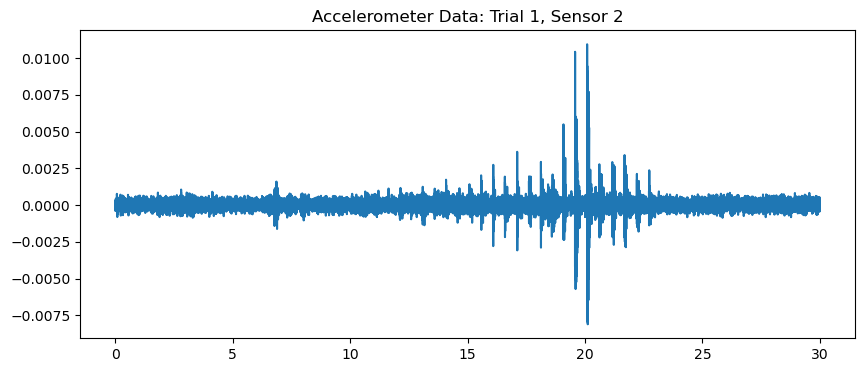

In [2]:

import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the HDF5 file
file_path = '../TestData/Test_2/data/walking_hallway_single_person_APDM_003.hdf5'

#all_sensor_data = h5py.File[file_path]
#all_sensor_data = h5py.File["TestData/Test_2/data"]
#all_sensor_data = h5py.File['experiment/data']
#all_sensor_data = h5_file['experiment/data']
#print("all_sensor_data.shape:", all_sensor_data.shape) # (21, 20, 49560) (Trial, Sensor_number, Total_data_points)

# Load the HDF5 file and extract data for the second accelerometer in the first trial
with h5py.File(file_path, 'r') as file:
    accelerometer_data = file['experiment/data'][0, 1, :]  # First trial, Second accelerometer

# Calculate the time vector
sampling_frequency = 1652  # in Hz
total_points = accelerometer_data.shape[0]
time = np.linspace(0, total_points / sampling_frequency, total_points)

# Plotting the data with time on the x-axis
plt.figure(figsize=(10, 4))
plt.plot(time, accelerometer_data)
plt.title("Accelerometer Data: Trial 1, Sensor 2")

In [ ]:
plt.xlim(0,40)
plt.grid(True)
plt.show()

In [21]:
# Load the general parameters dataset from the HDF5 file
with h5py.File(file_path, 'r') as hdf_file:
    general_parameters = hdf_file['experiment/general_parameters'][:]

# Convert the structured array into a more readable format
general_parameters_list = []
for param in general_parameters:
    param_info = {
        'ID': param['id'],
        'Parameter': param['parameter'].decode('utf-8'),
        'Units': param['units'].decode('utf-8'),
        'Value': param['value'].decode('utf-8')
    }
    general_parameters_list.append(param_info)

# Convert the list to a DataFrame for better readability
general_parameters_df = pd.DataFrame(general_parameters_list)

# Display the DataFrame
print(general_parameters_df)

    ID        Parameter  Units  \
0    0               fs     Hz   
1    0    record_length      s   
2    0      pre_trigger      s   
3    0         Building    n/a   
4    0         Floor No    n/a   
5    0    Hallway Width     in   
6    0   Hallway Length     in   
7    0       Subject_ID    n/a   
8    0           Height     in   
9    0              Age  years   
10   0           Weight     lb   
11   0        shoe-type    n/a   
12   0  heel_strike_loc     in   

                                                Value  
0                                                1652  
1                                                30.0  
2                                                10.0  
3           Science and Engineering Innovation center  
4                                                   4  
5                                              118.11  
6                                                1063  
7                                                 001  
8                  